# AI Agents Tutorial.

Author: [Zoumana Keita](https://www.youtube.com/@techwithzoum)

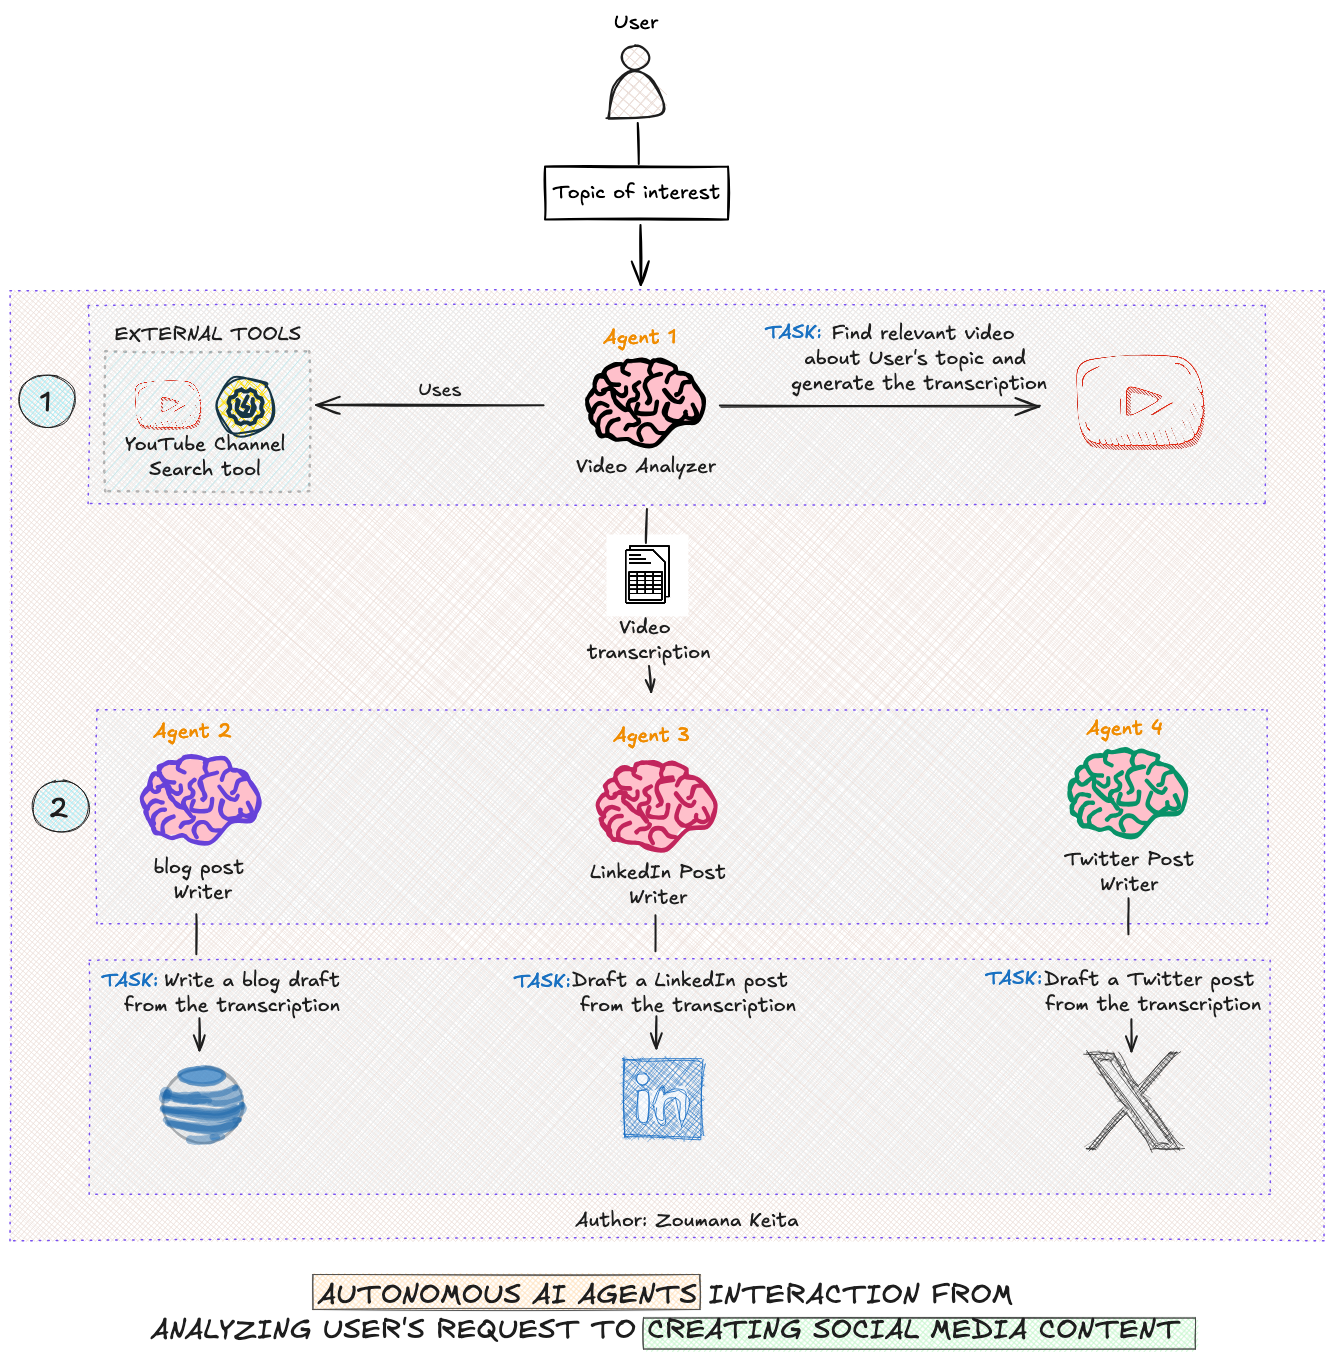

## 1. Install libraries

In [1]:
%%bash

pip -qqq install 'crewai[tools]'
pip -qqq install youtube-transcript-api
pip -qqq install yt_dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 863.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.9/210.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.4/360.4 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


## 2. Import libraries

In [ ]:
%%

In [2]:
import os
from crewai import Agent
from google.colab import userdata
from crewai import Crew, Process
from crewai_tools import YoutubeChannelSearchTool
from crewai import Task

In [3]:
OPENAI_API_KEY = userdata.get('OPEN_AI_KEY')
model_ID = userdata.get('GPT_MODEL')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
os.environ["OPENAI_MODEL_NAME"] = model_ID

# Agents and their tasks

In [4]:
# The tool used by the topic researcher
youtube_tool = YoutubeChannelSearchTool(youtube_channel_handle='@techwithzoum')

Processing videos:  19%|█▉        | 12/63 [00:02<00:05,  8.63it/s]ERROR:root:Failed to fetch transcript for video https://www.youtube.com/watch?v=kZu4m1Ut8lc
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/embedchain/loaders/youtube_video.py", line 28, in load_data
    languages = [transcript.language_code for transcript in YouTubeTranscriptApi.list_transcripts(video_id)]
  File "/usr/local/lib/python3.10/dist-packages/youtube_transcript_api/_api.py", line 71, in list_transcripts
    return TranscriptListFetcher(http_client).fetch(video_id)
  File "/usr/local/lib/python3.10/dist-packages/youtube_transcript_api/_transcripts.py", line 48, in fetch
    self._extract_captions_json(self._fetch_video_html(video_id), video_id),
  File "/usr/local/lib/python3.10/dist-packages/youtube_transcript_api/_transcripts.py", line 62, in _extract_captions_json
    raise TranscriptsDisabled(video_id)
youtube_transcript_api._errors.TranscriptsDisabled: 
Could not retriev

In [ ]:
youtube_tool

YoutubeChannelSearchTool(name='Search a Youtube Channels content', description="Search a Youtube Channels content(search_query: 'string') - A tool that can be used to semantic search a query the @techwithzoum Youtube Channels content. search_query: 'Mandatory search query you want to use to search the Youtube Channels content'", args_schema=<class 'crewai_tools.tools.youtube_channel_search_tool.youtube_channel_search_tool.FixedYoutubeChannelSearchToolSchema'>, description_updated=False, cache_function=<function BaseTool.<lambda> at 0x7c4d3bf99990>, result_as_answer=False, summarize=False, adapter=EmbedchainAdapter(embedchain_app=<embedchain.app.App object at 0x7c4d3b55f790>, summarize=False), config=None)

## 1. Agents

In [5]:
# Topic Researcher Agent
topic_researcher = Agent(
    role='Topic Researcher',
    goal='Search for relevant videos on the topic {topic} from the provided YouTube channel',
    verbose=True,
    memory=True,
    backstory="Expert in finding and analyzing relevant content from YouTube channels, specializing in AI, Data Science, Machine Learning, and Generative AI topics.",
    tools=[youtube_tool],
    allow_delegation=True
)


# LinkedIn Post Agent
linkedin_post_agent = Agent(
    role='LinkedIn Post Creator',
    goal='Create a concise LinkedIn post summary from the transcription provided by the Topic Researcher.',
    verbose=True,
    memory=True,
    backstory="Expert in crafting engaging LinkedIn posts that summarize complex topics and include trending hashtags for maximum visibility.",
    allow_delegation=False
)


# Twitter Agent
twitter_agent = Agent(
    role='Twitter Content Creator',
    goal='Create a short tweet from the transcription provided by the Topic Researcher that capture key points and insights',
    verbose=True,
    memory=True,
    backstory="Specializes in distilling complex information into concise, impactful tweets that resonate with a tech-savvy audience.",
    allow_delegation=False
)

# Blog Writer Agent
blog_writer = Agent(
    role='Blog Writer',
    goal='Write a comprehensive blog post from the transcription provided by the Topic Researcher, covering all necessary sections',
    verbose=True,
    memory=True,
    backstory="Experienced in creating in-depth, well-structured blog posts that explain technical concepts clearly and engage readers from introduction to conclusion.",
    allow_delegation=False
)


## 2. Tasks

In [6]:
# Tasks
research_task = Task(
    description="Identify and analyze videos on the topic {topic} from the specified YouTube channel.",
    expected_output="A complete word by word report on the most relevant video found on the topic {topic}.",
    agent=topic_researcher,
    tools=[youtube_tool]
)


blog_writing_task = Task(
    description=""" Write a comprehensive blog post based on the transcription provided by the Topic Researcher.
                    The article must include an introduction , step-by-step guides, and conclusion.
                    The overall content must be about 1200 words long.""",
    expected_output="A markdown-formatted of the blog",
    agent=blog_writer,
    output_file='blog-post.md'
)

linkedin_post_task = Task(
    description="Create a LinkedIn post summarizing the key points from the transcription provided by the Topic Researcher, including relevant hashtags.",
    expected_output="A markdown-formatted of the LinkedIn post",
    agent=linkedin_post_agent,
    output_file='linkedin-post.md'
)


twitter_task = Task(
    description="Create a tweet from the transcription provided by the Topic Researcher, including relevant hastags.",
    expected_output="A markdown-formatted of the Twitter post",
    agent=twitter_agent,
    output_file='tweets.md'
)

## 3. Run the Crew

In [7]:
# Crew setup
my_crew = Crew(
    agents=[topic_researcher, linkedin_post_agent, twitter_agent, blog_writer],
    tasks=[research_task, linkedin_post_task, twitter_task, blog_writing_task],
    verbose=True,
    process=Process.sequential,
    memory=True,
    cache=True,
    max_rpm=100,
    share_crew=True
)

In [8]:
# Execute the crew's tasks
topic_of_interest = 'GPT3.5 Turbo Fine-tuning and Graphical Interface'
result = my_crew.kickoff(inputs={'topic': topic_of_interest})

print("-----------------------------")
print(result)

 [2024-08-08 01:33:25][DEBUG]: == Working Agent: Topic Researcher
 [2024-08-08 01:33:25][INFO]: == Starting Task: Identify and analyze videos on the topic GPT3.5 Turbo Fine-tuning and Graphical Interface from the specified YouTube channel.


> Entering new CrewAgentExecutor chain...
I need to search the @techwithzoum YouTube channel for videos related to "GPT3.5 Turbo Fine-tuning and Graphical Interface."

Action: Search a Youtube Channels content
Action Input: {"search_query": "GPT3.5 Turbo Fine-tuning and Graphical Interface"} 

Relevant Content:
GPT 3.5 turbo model was made available for fine tuning a few days ago and in this tutorial I'll explain how you can create a personal assistant using your custom data the data set I will be using is the Yahoo question answering data sets it has two main columns the question column and the answer column let's get back to the notebook and the first thing to do is to install the data sets package which is used to download data set from hugging 